# Notebook Avanzado: K-Nearest Neighbors (KNN) para la Toma de Decisiones Empresariales



### 1.1 ¿Qué es K-Nearest Neighbors (KNN)?

El algoritmo K-Nearest Neighbors (KNN) es un método no paramétrico y supervisado utilizado tanto para problemas de clasificación como de regresión. Su simplicidad y eficacia lo han convertido en una herramienta popular en diversos campos, incluyendo el análisis de negocios. A diferencia de otros algoritmos que construyen un modelo general a partir de los datos de entrenamiento, KNN es un algoritmo de "aprendizaje perezoso" (lazy learning), lo que significa que no realiza ninguna generalización o modelado durante la fase de entrenamiento. En su lugar, almacena todo el conjunto de datos de entrenamiento y solo realiza cálculos cuando se le presenta una nueva instancia para predecir.

La idea central detrás de KNN es que instancias similares existen en la proximidad. Es decir, si queremos clasificar un nuevo punto de datos, KNN busca los 'k' puntos de datos más cercanos (vecinos) en el conjunto de entrenamiento y asigna al nuevo punto la clase más común entre esos 'k' vecinos (para clasificación) o el promedio de sus valores (para regresión). La "cercanía" se mide generalmente utilizando una métrica de distancia, siendo la distancia euclidiana la más común, aunque otras como la distancia Manhattan o la distancia de Minkowski también pueden ser utilizadas.

En el ámbito empresarial, KNN puede ser extremadamente útil para tareas como la identificación de clientes propensos a abandonar un servicio (churn prediction), la clasificación de transacciones como fraudulentas o legítimas, la recomendación de productos a usuarios basándose en el comportamiento de usuarios similares, o la segmentación de clientes en grupos homogéneos para campañas de marketing personalizadas. Su naturaleza intuitiva y la facilidad de interpretación de sus resultados lo hacen accesible para profesionales de negocios que no necesariamente tienen una profunda experiencia en ciencia de datos.

### 1.2 Principios Matemáticos y Funcionamiento

El funcionamiento de KNN se basa en unos pocos principios matemáticos y pasos algorítmicos claros:

1.  **Elección de `k`:** El primer paso y uno de los más críticos es la selección del número de vecinos (`k`). Un valor pequeño de `k` puede hacer que el modelo sea sensible al ruido en los datos, mientras que un valor grande puede suavizar demasiado las fronteras de decisión, ignorando patrones locales importantes. La elección óptima de `k` a menudo se determina mediante técnicas de validación cruzada o experimentación.

2.  **Cálculo de Distancia:** Para un nuevo punto de datos `x_q` que se desea clasificar, KNN calcula la distancia entre `x_q` y cada uno de los puntos de datos en el conjunto de entrenamiento. La distancia euclidiana entre dos puntos `p = (p1, p2, ..., pn)` y `q = (q1, q2, ..., qn)` en un espacio n-dimensional se define como:

    $$ d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

    Otras métricas de distancia incluyen:
    *   **Distancia Manhattan (o L1):** $$d(p, q) = \sum_{i=1}^{n} |p_i - q_i|$$
    *   **Distancia de Minkowski:** Una generalización de las distancias euclidiana y Manhattan, definida como:
        $$ d(p, q) = \left( \sum_{i=1}^{n} |p_i - q_i|^r \right)^{1/r} $$
        Donde `r=1` es Manhattan y `r=2` es Euclideana.

3.  **Identificación de los `k` Vecinos Más Cercanos:** Una vez calculadas todas las distancias, se seleccionan los `k` puntos de datos del conjunto de entrenamiento que tienen las distancias más pequeñas a `x_q`.

4.  **Votación (Clasificación) o Promedio (Regresión):**
    *   **Para Clasificación:** El nuevo punto `x_q` se asigna a la clase que es más frecuente entre sus `k` vecinos más cercanos. Esto se conoce como "votación por mayoría". En algunos casos, se puede ponderar la votación por la inversa de la distancia, dando más peso a los vecinos más cercanos.
    *   **Para Regresión:** El valor predicho para `x_q` es el promedio de los valores de la variable objetivo de sus `k` vecinos más cercanos.

Es fundamental que las características de los datos estén en la misma escala antes de aplicar KNN, ya que las características con rangos de valores más grandes podrían dominar el cálculo de la distancia. Por ello, el escalado de características (normalización o estandarización) es un paso de preprocesamiento crucial para KNN.

### 1.3 Ventajas y Limitaciones de KNN en Negocios

**Ventajas:**

*   **Simplicidad e Intuitividad:** Es fácil de entender e implementar, lo que facilita su adopción por equipos de negocio.
*   **No Paramétrico:** No hace suposiciones sobre la distribución subyacente de los datos, lo que lo hace flexible para una amplia gama de problemas.
*   **Versatilidad:** Puede ser utilizado tanto para problemas de clasificación como de regresión.
*   **Aprendizaje Adaptativo:** Como algoritmo de aprendizaje perezoso, puede adaptarse fácilmente a nuevos datos de entrenamiento sin necesidad de reentrenar todo el modelo.
*   **Eficaz para Datos Complejos:** Puede modelar relaciones complejas entre características sin la necesidad de construir un modelo explícito.

**Limitaciones:**

*   **Costo Computacional:** El cálculo de distancias para cada nuevo punto con respecto a todo el conjunto de entrenamiento puede ser computacionalmente costoso y lento para grandes datasets, especialmente en la fase de predicción.
*   **Sensibilidad a la Dimensionalidad (Maldición de la Dimensionalidad):** En espacios de alta dimensionalidad, la noción de "cercanía" se vuelve menos significativa, y el rendimiento de KNN puede degradarse. Esto se debe a que en dimensiones altas, todos los puntos tienden a estar "lejos" unos de otros.
*   **Sensibilidad a la Escala de Características:** Como se mencionó, las características con rangos de valores más grandes pueden dominar la función de distancia, por lo que el escalado de datos es esencial.
*   **Sensibilidad al Ruido:** Un valor pequeño de `k` puede hacer que el modelo sea muy sensible a los puntos de datos ruidosos o atípicos.
*   **Almacenamiento de Datos:** Almacena todo el conjunto de datos de entrenamiento, lo que puede requerir una gran cantidad de memoria para datasets muy grandes.

A pesar de sus limitaciones, con un preprocesamiento adecuado y una selección cuidadosa de `k`, KNN sigue siendo una herramienta poderosa y valiosa para la toma de decisiones empresariales, especialmente cuando la interpretabilidad y la simplicidad son prioritarias.




## 2. Preparación del Entorno y Datos para Google Colab

Para asegurar la reproducibilidad y facilitar el uso de este notebook en Google Colab, comenzaremos configurando el entorno e importando las librerías necesarias. Además, generaremos un dataset sintético para nuestro primer caso de uso, la predicción de abandono de clientes (Churn Prediction), lo que nos permitirá controlar las características de los datos y enfocarnos en la aplicación de KNN.

### 2.1 Configuración del Entorno y Librerías

Google Colab ya viene con muchas de las librerías de ciencia de datos preinstaladas. Si alguna librería no estuviera disponible, se podría instalar utilizando el comando `!pip install <nombre_libreria>`. Para este notebook, utilizaremos `pandas` para la manipulación de datos, `numpy` para operaciones numéricas, `matplotlib` y `seaborn` para visualizaciones, y `scikit-learn` para el algoritmo KNN y las herramientas de preprocesamiento y evaluación.

In [1]:
# 2.1 Configuración de Google Colab (no se requiere instalación adicional para las librerías estándar)

# 2.2 Importación de Librerías Esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer

# Configuración para visualizaciones
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 10

### 2.2 Carga y Generación de Datos Sintéticos

Para ilustrar el caso de uso de predicción de abandono de clientes, generaremos un dataset sintético que simule características de clientes de una empresa de telecomunicaciones. Este enfoque nos permite crear un conjunto de datos con las propiedades deseadas para demostrar el funcionamiento de KNN sin las complejidades de obtener y limpiar un dataset real, aunque los principios aplicados son directamente transferibles a datos reales.

El dataset incluirá variables como la antigüedad del cliente, el tipo de servicio, el tipo de contrato, la factura mensual, el gasto total, si tiene soporte técnico o múltiples líneas, y la variable objetivo: si el cliente ha abandonado (Churn) o no.


--- Primeras 5 filas del dataset de Churn ---
   Antiguedad_Meses Servicio_Internet Tipo_Contrato  Factura_Mensual  \
0              52.0               DSL         Anual       102.300357   
1              15.0                No      Dos Anos        43.503130   
2              61.0               DSL       Mensual        85.228111   
3              21.0                No       Mensual        60.519714   
4              24.0      Fibra Optica       Mensual        79.604360   

   Total_Gastado Soporte_Tecnico Multiples_Lineas  Churn  
0    4326.331928              Si               No      1  
1     782.211312              No               No      0  
2    4364.909664              Si               Si      1  
3    1363.762808              Si               No      0  
4    1721.621598              No               No      0  

--- Información del dataset de Churn ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       

/tmp/ipython-input-3527521537.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_churn, palette='viridis')


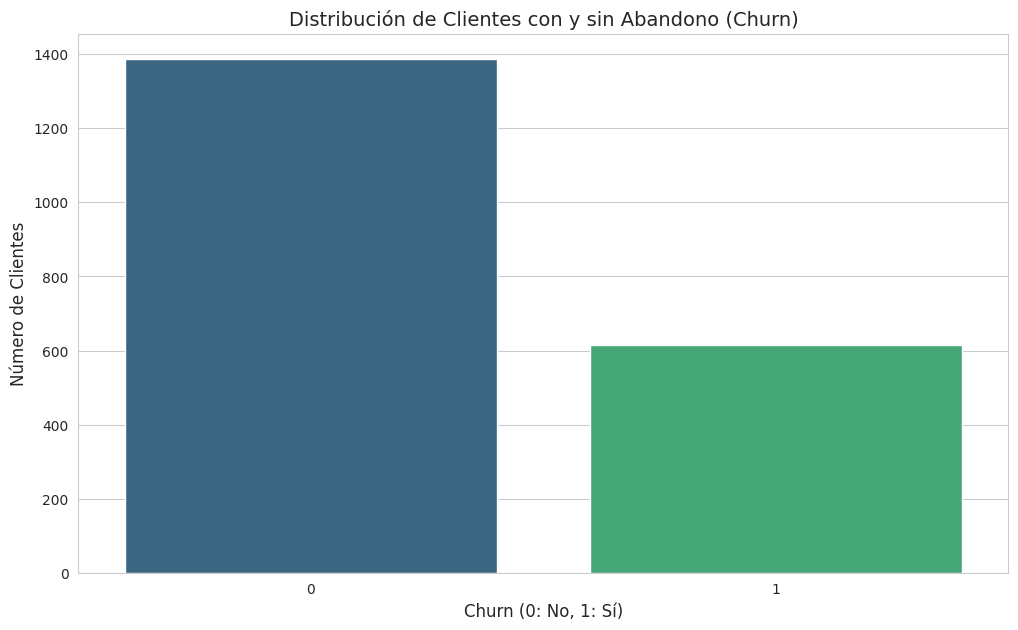

In [2]:
# Generación de datos sintéticos para el ejemplo de Churn Prediction
np.random.seed(42) # Para reproducibilidad
num_clientes = 2000 # Aumentamos el número de clientes para un análisis más robusto

data = {
    'Antiguedad_Meses': np.random.randint(1, 72, num_clientes),
    'Servicio_Internet': np.random.choice(['DSL', 'Fibra Optica', 'No'], num_clientes, p=[0.35, 0.45, 0.20]),
    'Tipo_Contrato': np.random.choice(['Mensual', 'Anual', 'Dos Anos'], num_clientes, p=[0.6, 0.2, 0.2]),
    'Factura_Mensual': np.random.uniform(20, 120, num_clientes),
    'Total_Gastado': np.random.uniform(50, 8000, num_clientes),
    'Soporte_Tecnico': np.random.choice(['Si', 'No'], num_clientes, p=[0.4, 0.6]),
    'Multiples_Lineas': np.random.choice(['Si', 'No'], num_clientes, p=[0.45, 0.55]),
    'Churn': np.random.choice([0, 1], num_clientes, p=[0.7, 0.3]) # 0: No Churn, 1: Churn
}

df_churn = pd.DataFrame(data)

# Ajustar Total_Gastado para que sea más consistente con Antiguedad_Meses y Factura_Mensual
df_churn['Total_Gastado'] = df_churn['Antiguedad_Meses'] * df_churn['Factura_Mensual'] * np.random.uniform(0.8, 1.2, num_clientes)
df_churn['Total_Gastado'] = df_churn['Total_Gastado'].apply(lambda x: max(x, df_churn['Factura_Mensual'].min()))

# Introducir algunos valores nulos para demostrar el preprocesamiento
for col in ['Antiguedad_Meses', 'Factura_Mensual', 'Total_Gastado']:
    df_churn.loc[df_churn.sample(frac=0.02, random_state=42).index, col] = np.nan

print("\n--- Primeras 5 filas del dataset de Churn ---")
print(df_churn.head())

print("\n--- Información del dataset de Churn ---")
print(df_churn.info())

print("\n--- Estadísticas descriptivas del dataset de Churn ---")
print(df_churn.describe())

print("\n--- Conteo de valores nulos por columna ---")
print(df_churn.isnull().sum())

print("\n--- Distribución de la variable objetivo (Churn) ---")
print(df_churn['Churn'].value_counts(normalize=True))

sns.countplot(x='Churn', data=df_churn, palette='viridis')
plt.title('Distribución de Clientes con y sin Abandono (Churn)')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.show()

```




## 3. Caso de Uso 1: Predicción de Riesgo de Abandono de Clientes (Churn Prediction)

### 3.1 Definición del Problema de Negocio

La predicción de abandono de clientes, o *churn prediction*, es uno de los desafíos más críticos y rentables en la gestión de relaciones con clientes (CRM) para empresas en diversos sectores como telecomunicaciones, banca, servicios de suscripción (SaaS) y comercio electrónico. El abandono se refiere a la pérdida de clientes que dejan de utilizar los productos o servicios de una empresa. La importancia de predecir el abandono radica en que, generalmente, es mucho más costoso adquirir un nuevo cliente que retener uno existente. Las empresas invierten significativamente en estrategias de retención, y la capacidad de identificar proactivamente a los clientes con alto riesgo de abandono permite dirigir estos esfuerzos de manera eficiente y personalizada.

En este caso de estudio, nuestro objetivo es construir un modelo de clasificación utilizando K-Nearest Neighbors (KNN) que pueda predecir si un cliente individual abandonará el servicio en un futuro cercano. Al identificar a estos clientes en riesgo, la empresa puede implementar intervenciones específicas, como ofertas personalizadas, mejoras en el servicio al cliente, o programas de fidelización, para mitigar la probabilidad de abandono. Este enfoque no solo busca reducir la tasa de churn, sino también optimizar la asignación de recursos de marketing y servicio al cliente.

### 3.2 Preprocesamiento y Exploración de Datos

El preprocesamiento de datos es un paso fundamental para cualquier modelo de aprendizaje automático, y KNN no es una excepción. Dada su sensibilidad a la escala de las características y a los valores atípicos, es crucial preparar los datos adecuadamente. Esto incluye el manejo de valores nulos, la codificación de variables categóricas y el escalado de características numéricas. Para este ejemplo, utilizaremos el dataset sintético generado en la sección anterior.


--- Conteo de valores nulos después de la imputación ---
Antiguedad_Meses     0
Servicio_Internet    0
Tipo_Contrato        0
Factura_Mensual      0
Total_Gastado        0
Soporte_Tecnico      0
Multiples_Lineas     0
Churn                0
dtype: int64

--- Primeras 5 filas de las características (X) después del One-Hot Encoding ---
   Antiguedad_Meses  Factura_Mensual  Total_Gastado  \
0              52.0       102.300357    4326.331928   
1              15.0        43.503130     782.211312   
2              61.0        85.228111    4364.909664   
3              21.0        60.519714    1363.762808   
4              24.0        79.604360    1721.621598   

   Servicio_Internet_Fibra Optica  Servicio_Internet_No  \
0                           False                 False   
1                           False                  True   
2                           False                 False   
3                           False                  True   
4                            True    

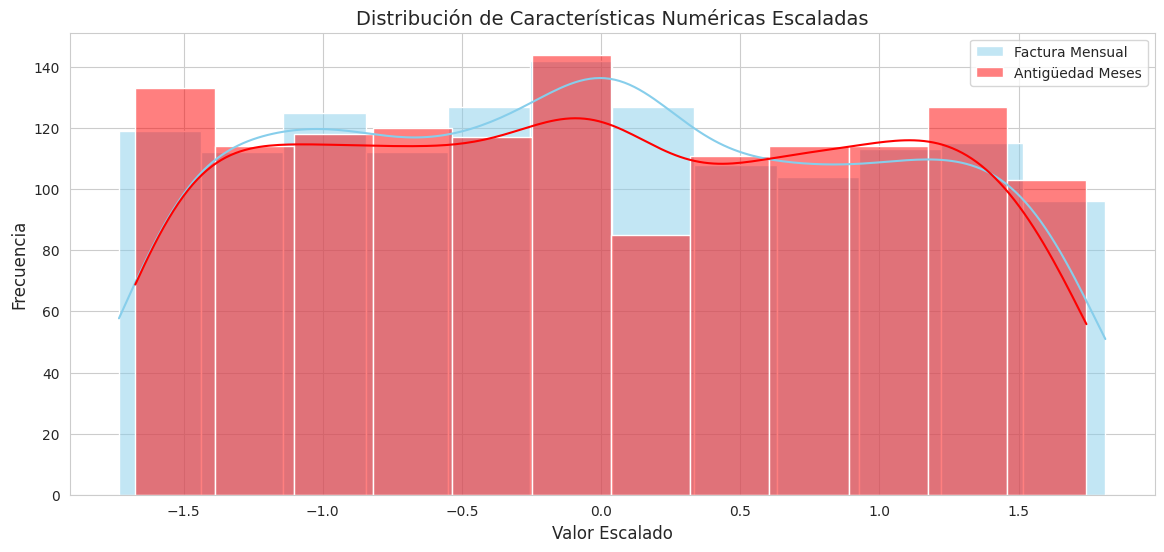

In [3]:
# Manejo de valores nulos: Imputación con la media para columnas numéricas
for col in df_churn.select_dtypes(include=np.number).columns:
    if df_churn[col].isnull().any():
        imputer = SimpleImputer(strategy='mean')
        df_churn[col] = imputer.fit_transform(df_churn[[col]])

print("\n--- Conteo de valores nulos después de la imputación ---")
print(df_churn.isnull().sum())

# Codificación de variables categóricas usando One-Hot Encoding
df_churn_processed = pd.get_dummies(df_churn, columns=[
    'Servicio_Internet', 'Tipo_Contrato', 'Soporte_Tecnico', 'Multiples_Lineas'
], drop_first=True) # drop_first=True para evitar la trampa de las variables dummy

# Separar características (X) y variable objetivo (y)
X = df_churn_processed.drop('Churn', axis=1)
y = df_churn_processed['Churn']

print("\n--- Primeras 5 filas de las características (X) después del One-Hot Encoding ---")
print(X.head())
print("\n--- Dimensiones de X e y ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos stratify=y para asegurar que la proporción de clases en y se mantenga en los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalado de características numéricas
# Es crucial escalar los datos para KNN, ya que se basa en la distancia euclidiana.
# StandardScaler es una buena opción para datos que siguen una distribución normal.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir los arrays escalados de nuevo a DataFrames para mantener los nombres de las columnas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\n--- Dimensiones de los datos después del preprocesamiento y división ---")
print(f"X_train_scaled: {X_train_scaled_df.shape}")
print(f"X_test_scaled: {X_test_scaled_df.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Visualización de la distribución de algunas características escaladas
plt.figure(figsize=(14, 6))
sns.histplot(X_train_scaled_df['Factura_Mensual'], color='skyblue', kde=True, label='Factura Mensual')
sns.histplot(X_train_scaled_df['Antiguedad_Meses'], color='red', kde=True, label='Antigüedad Meses')
plt.title('Distribución de Características Numéricas Escaladas')
plt.xlabel('Valor Escalado')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### 3.3 Implementación del Modelo KNN

Con los datos preprocesados y escalados, procedemos a implementar el clasificador KNN. La elección del número de vecinos (`k`) es un hiperparámetro clave que puede influir significativamente en el rendimiento del modelo. Un `k` pequeño puede llevar a un modelo más sensible al ruido (overfitting), mientras que un `k` grande puede suavizar demasiado las fronteras de decisión (underfitting). A menudo, se explora un rango de valores de `k` para encontrar el óptimo.

In [4]:
# Implementación del clasificador KNN
k_neighbors = 7 # Un valor impar es preferible para evitar empates en la votación de clases
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)

# Entrenar el modelo con los datos escalados de entrenamiento
knn_classifier.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = knn_classifier.predict(X_test_scaled)
y_pred_proba = knn_classifier.predict_proba(X_test_scaled)[:, 1] # Probabilidades de la clase positiva (Churn)

print(f"\nModelo KNN entrenado con k = {k_neighbors}")


Modelo KNN entrenado con k = 7


### 3.4 Evaluación Detallada del Rendimiento

La evaluación del modelo es crucial para entender su capacidad predictiva y su idoneidad para el problema de negocio. Utilizaremos métricas estándar de clasificación y visualizaciones para obtener una comprensión completa del rendimiento del modelo KNN.


Precisión del modelo KNN: 0.5983

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       416
           1       0.20      0.10      0.14       184

    accuracy                           0.60       600
   macro avg       0.44      0.46      0.44       600
weighted avg       0.53      0.60      0.55       600



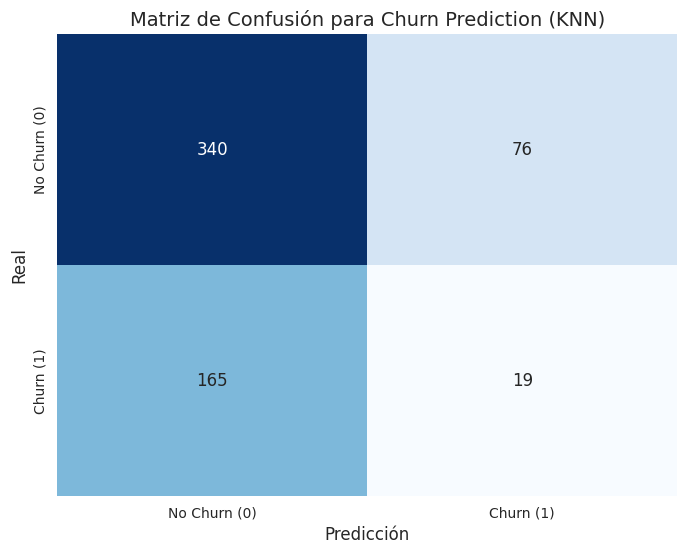

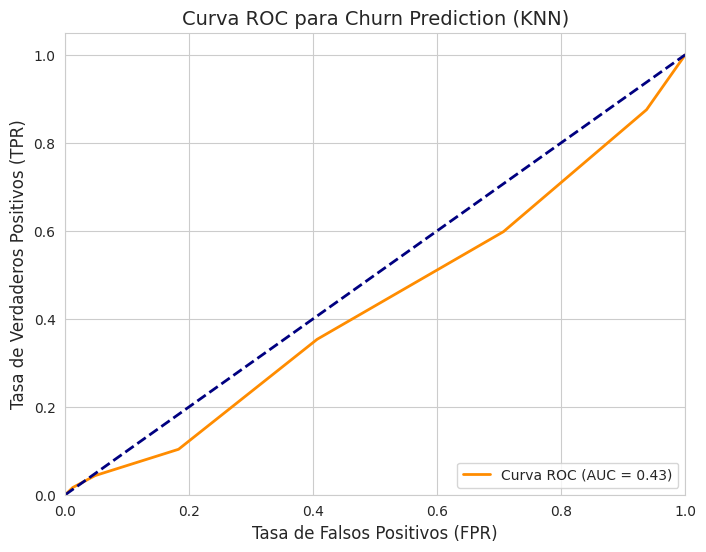

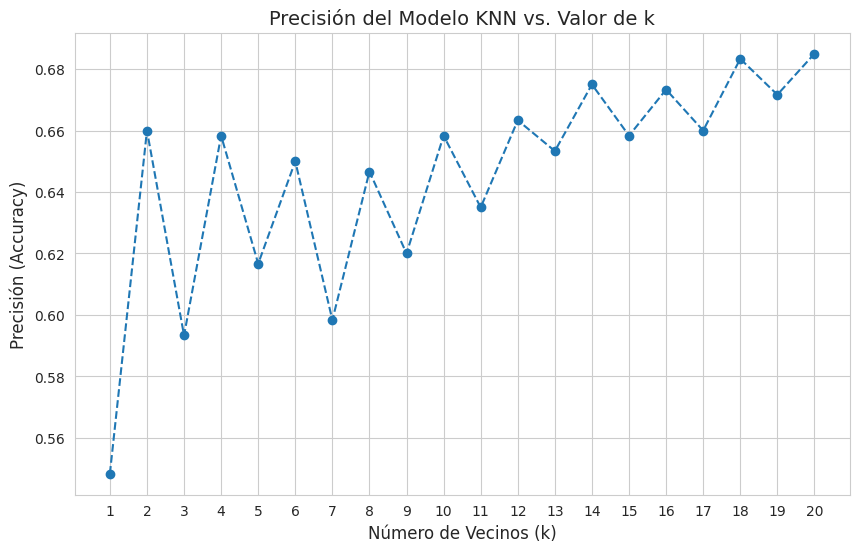


El valor óptimo de k basado en la precisión en el conjunto de prueba es: 20


In [5]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo KNN: {accuracy:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn (0)", "Churn (1)"],
            yticklabels=["No Churn (0)", "Churn (1)"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión para Churn Prediction (KNN)")
plt.show()

# Curva ROC y AUC
# La curva ROC (Receiver Operating Characteristic) y el Área bajo la Curva (AUC)
# son métricas importantes para evaluar el rendimiento de clasificadores binarios,
# especialmente en datasets desbalanceados.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para Churn Prediction (KNN)')
plt.legend(loc="lower right")
plt.show()

# Optimización del hiperparámetro k (opcional, pero recomendado para maestría)
# Podemos usar un bucle para probar diferentes valores de k y visualizar su impacto en la precisión.
accuracies = []
for i in range(1, 21): # Probar k desde 1 hasta 20
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', linestyle='--')
plt.title('Precisión del Modelo KNN vs. Valor de k')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión (Accuracy)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

optimal_k = np.argmax(accuracies) + 1
print(f"\nEl valor óptimo de k basado en la precisión en el conjunto de prueba es: {optimal_k}")

### 3.5 Interpretación de Resultados y Estrategias de Decisión

La interpretación de los resultados del modelo KNN va más allá de la simple precisión; implica comprender las implicaciones de negocio de cada métrica y cómo estas pueden guiar la toma de decisiones estratégicas.

*   **Precisión (Accuracy):** Si bien es una métrica general, en problemas de abandono (donde la clase 'no churn' suele ser mayoritaria), puede ser engañosa. Un modelo que predice siempre 'no churn' podría tener una alta precisión si la mayoría de los clientes no abandonan, pero sería inútil para identificar a los que sí lo hacen.

*   **Reporte de Clasificación (Precision, Recall, F1-Score):**
    *   **Precision para la clase 'Churn' (1):** De todos los clientes que el modelo identificó como propensos a abandonar, ¿qué proporción realmente lo hizo? Una alta precisión minimiza las intervenciones de retención en clientes que no iban a abandonar (falsos positivos), ahorrando recursos.
    *   **Recall para la clase 'Churn' (1):** De todos los clientes que realmente abandonaron, ¿qué proporción fue correctamente identificada por el modelo? Un alto recall es crucial para no perder la oportunidad de retener a clientes valiosos que están en riesgo (minimiza falsos negativos).
    *   **F1-Score:** Es una media armónica de precisión y recall. Es útil cuando se busca un equilibrio entre ambos, especialmente en clases desbalanceadas.

*   **Matriz de Confusión:** Proporciona una visión detallada de los aciertos y errores del modelo:
    *   **Verdaderos Positivos (TP):** Clientes correctamente identificados como 'Churn'. Estos son los clientes a los que la empresa debe dirigir sus esfuerzos de retención.
    *   **Verdaderos Negativos (TN):** Clientes correctamente identificados como 'No Churn'. El modelo acertó al no intervenir en ellos.
    *   **Falsos Positivos (FP):** Clientes identificados como 'Churn' pero que en realidad no iban a abandonar. Representan un costo de oportunidad (recursos gastados innecesariamente) y potencialmente una molestia para el cliente.
    *   **Falsos Negativos (FN):** Clientes identificados como 'No Churn' pero que en realidad sí abandonaron. Estos son los clientes perdidos que el modelo no pudo detectar, lo que implica una pérdida de ingresos.

*   **Curva ROC y AUC:** El Área Bajo la Curva ROC (AUC-ROC) mide la capacidad del modelo para distinguir entre clases. Un AUC de 0.5 indica un rendimiento aleatorio, mientras que 1.0 indica un clasificador perfecto. Un AUC alto sugiere que el modelo es bueno para rankear las probabilidades de abandono, lo que es útil para priorizar intervenciones.

**Estrategias de Decisión Basadas en KNN:**

1.  **Priorización de Intervenciones:** Utilizar las probabilidades de abandono (`y_pred_proba`) para clasificar a los clientes por riesgo. Los clientes con las probabilidades más altas de 'Churn' deberían ser los primeros en recibir ofertas de retención personalizadas o llamadas de seguimiento.
2.  **Optimización de Recursos:** Al entender el equilibrio entre Falsos Positivos y Falsos Negativos (a través de la matriz de confusión y la curva ROC), la empresa puede ajustar el umbral de decisión del modelo. Si el costo de perder un cliente es muy alto, se podría aceptar un mayor número de Falsos Positivos para asegurar que se capturen más Verdaderos Positivos (mayor recall).
3.  **Personalización de Ofertas:** Los vecinos más cercanos de un cliente en riesgo pueden ofrecer información sobre qué tipo de ofertas o servicios han sido efectivos para retener a clientes con perfiles similares. Esto permite una micro-segmentación dinámica para las campañas de retención.
4.  **Monitoreo Continuo:** El modelo KNN debe ser reentrenado periódicamente con nuevos datos para adaptarse a los cambios en el comportamiento del cliente y las condiciones del mercado. Esto asegura que las predicciones sigan siendo relevantes y precisas.
5.  **Análisis de Características:** Aunque KNN no proporciona una 'importancia de características' directa como otros modelos, el análisis de las características que definen a los vecinos más cercanos puede dar pistas sobre los factores que influyen en el abandono. Por ejemplo, si los clientes que abandonan tienen en común la falta de soporte técnico, esto podría indicar un área de mejora en el servicio.

En resumen, el modelo KNN no solo predice el abandono, sino que también proporciona una base sólida para la implementación de estrategias de retención proactivas y personalizadas, lo que se traduce directamente en una mejora de la rentabilidad y la lealtad del cliente. La clave está en una interpretación cuidadosa de sus métricas y en la adaptación de las decisiones de negocio a los insights obtenidos.




## 4. Caso de Uso 2: Sistema de Recomendación Basado en Similitud de Clientes

### 4.1 Definición del Problema de Negocio

Los sistemas de recomendación son herramientas cruciales en el comercio electrónico, el entretenimiento digital y muchas otras industrias, diseñados para sugerir productos, servicios o contenido a los usuarios basándose en sus preferencias o en el comportamiento de usuarios similares. El objetivo principal es mejorar la experiencia del usuario, aumentar el compromiso, impulsar las ventas y la retención. Un sistema de recomendación efectivo puede transformar la forma en que los clientes interactúan con una plataforma, guiándolos hacia elementos que probablemente les interesen, incluso si no los buscaron activamente.

En este caso de uso, exploraremos cómo K-Nearest Neighbors (KNN) puede ser utilizado para construir un sistema de recomendación colaborativo basado en la similitud entre usuarios. La idea es que si dos usuarios tienen gustos o comportamientos similares en el pasado (por ejemplo, han comprado productos parecidos o han calificado películas de manera similar), es probable que al usuario A le gusten los ítems que le gustaron al usuario B, y viceversa. Este enfoque es particularmente valioso para empresas que buscan personalizar la experiencia del cliente y aumentar el valor de vida del cliente (CLV).

Utilizaremos un dataset sintético que simula las calificaciones de los usuarios a diferentes productos. Nuestro objetivo será, dado un usuario, recomendarle productos que aún no ha calificado, basándonos en las calificaciones de sus vecinos más cercanos (usuarios con gustos similares).

### 4.2 Preparación de Datos y Similitud

Para un sistema de recomendación basado en KNN, necesitamos una matriz de interacciones usuario-ítem. Cada fila representará un usuario y cada columna un ítem (producto, película, etc.), con los valores indicando la calificación o interacción del usuario con ese ítem. Dado que la mayoría de los usuarios solo interactúan con un pequeño subconjunto de ítems, esta matriz suele ser muy dispersa (sparse). El preprocesamiento aquí se centrará en la creación de esta matriz y en el manejo de su dispersión.


--- Primeras 5 filas del dataset de Calificaciones (ratings) ---
           Producto_1  Producto_2  Producto_3  Producto_4  Producto_5  \
Usuario_1         NaN         5.0         5.0         4.0         2.0   
Usuario_2         5.0         5.0         3.0         4.0         4.0   
Usuario_3         NaN         4.0         3.0         5.0         3.0   
Usuario_4         3.0         NaN         3.0         1.0         5.0   
Usuario_5         4.0         3.0         NaN         4.0         5.0   

           Producto_6  Producto_7  Producto_8  Producto_9  Producto_10  ...  \
Usuario_1         3.0         4.0         3.0         4.0          4.0  ...   
Usuario_2         5.0         1.0         2.0         4.0          4.0  ...   
Usuario_3         5.0         3.0         2.0         3.0          5.0  ...   
Usuario_4         5.0         5.0         NaN         4.0          5.0  ...   
Usuario_5         2.0         3.0         4.0         2.0          4.0  ...   

           Producto_

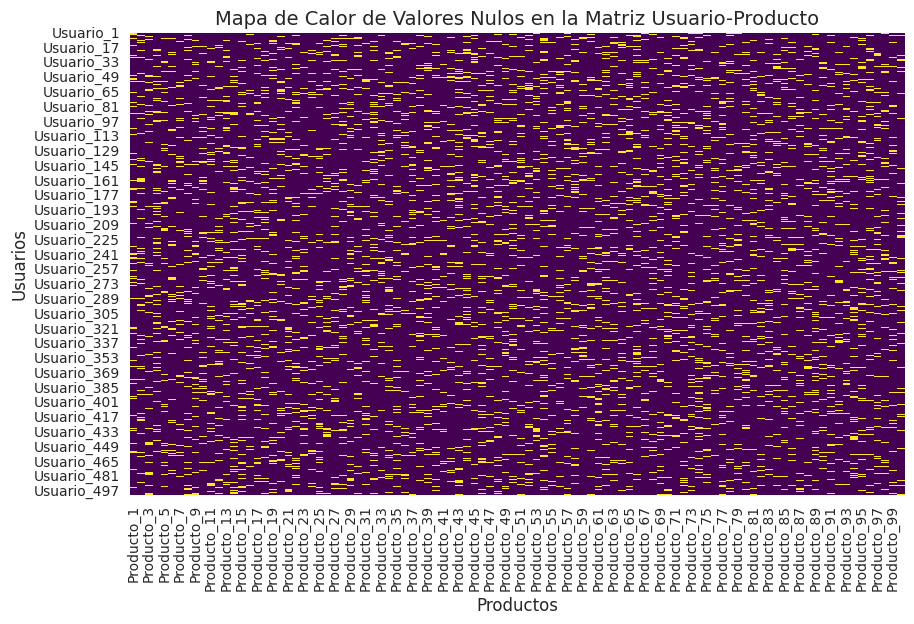


--- Primeras 5 filas del dataset de Calificaciones después de la imputación ---
           Producto_1  Producto_2  Producto_3  Producto_4  Producto_5  \
Usuario_1    3.494505     5.00000    5.000000         4.0         2.0   
Usuario_2    5.000000     5.00000    3.000000         4.0         4.0   
Usuario_3    3.645161     4.00000    3.000000         5.0         3.0   
Usuario_4    3.000000     3.77381    3.000000         1.0         5.0   
Usuario_5    4.000000     3.00000    3.698925         4.0         5.0   

           Producto_6  Producto_7  Producto_8  Producto_9  Producto_10  ...  \
Usuario_1         3.0         4.0     3.00000         4.0          4.0  ...   
Usuario_2         5.0         1.0     2.00000         4.0          4.0  ...   
Usuario_3         5.0         3.0     2.00000         3.0          5.0  ...   
Usuario_4         5.0         5.0     3.77381         4.0          5.0  ...   
Usuario_5         2.0         3.0     4.00000         2.0          4.0  ...   

     

In [6]:
# Generación de datos sintéticos para el ejemplo de Sistema de Recomendación
np.random.seed(24) # Para reproducibilidad
num_usuarios = 500
num_productos = 100

# Simular calificaciones de usuarios a productos (escala de 1 a 5)
# La mayoría de las calificaciones serán nulas (NaN) para simular la dispersión
ratings_data = {
    f'Producto_{i}': np.random.choice([1, 2, 3, 4, 5, np.nan], num_usuarios, p=[0.05, 0.1, 0.2, 0.3, 0.25, 0.1])
    for i in range(1, num_productos + 1)
}

df_ratings = pd.DataFrame(ratings_data, index=[f'Usuario_{i}' for i in range(1, num_usuarios + 1)])

print("\n--- Primeras 5 filas del dataset de Calificaciones (ratings) ---")
print(df_ratings.head())

print("\n--- Información del dataset de Calificaciones ---")
print(df_ratings.info())

# Visualización de la dispersión de la matriz de calificaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df_ratings.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Calor de Valores Nulos en la Matriz Usuario-Producto")
plt.xlabel("Productos")
plt.ylabel("Usuarios")
plt.show()

# Imputación de valores nulos para el cálculo de similitud
# Para KNN, no podemos tener valores nulos. Una estrategia común es imputar con la media de las calificaciones del usuario
# o con 0 si se interpreta como 'no ha calificado'. Aquí usaremos la media del usuario.

df_ratings_filled = df_ratings.apply(lambda row: row.fillna(row.mean()), axis=1)

# Si un usuario no ha calificado ningún producto, su media sería NaN. Llenamos esos con 0 o una media global.
df_ratings_filled = df_ratings_filled.fillna(0) # O df_ratings_filled.mean().mean() si queremos la media global

print("\n--- Primeras 5 filas del dataset de Calificaciones después de la imputación ---")
print(df_ratings_filled.head())

# Escalado de las calificaciones (opcional pero recomendado para consistencia con KNN)
scaler_rec = MinMaxScaler() # Usamos MinMaxScaler para mantener el rango de 0 a 1
df_ratings_scaled = pd.DataFrame(scaler_rec.fit_transform(df_ratings_filled), columns=df_ratings_filled.columns, index=df_ratings_filled.index)

print("\n--- Primeras 5 filas del dataset de Calificaciones escaladas ---")
print(df_ratings_scaled.head())

### 4.3 Aplicación de KNN para Recomendaciones

Para aplicar KNN en un sistema de recomendación basado en usuarios, cada usuario se representa como un punto en un espacio multidimensional (donde cada dimensión es un producto). La


distancia entre usuarios representa la disimilitud de sus gustos. Una vez que encontramos los `k` usuarios más similares a un usuario objetivo, podemos recomendarle productos que esos vecinos han calificado positivamente y que el usuario objetivo aún no ha visto o calificado.


--- Usuario Objetivo (ID: Usuario_103) ---
['Producto_1', 'Producto_4', 'Producto_5', 'Producto_9', 'Producto_12', 'Producto_15', 'Producto_17', 'Producto_18', 'Producto_21', 'Producto_22', 'Producto_23', 'Producto_25', 'Producto_26', 'Producto_28', 'Producto_29', 'Producto_30', 'Producto_33', 'Producto_34', 'Producto_35', 'Producto_36', 'Producto_37', 'Producto_38', 'Producto_39', 'Producto_43', 'Producto_45', 'Producto_46', 'Producto_47', 'Producto_48', 'Producto_49', 'Producto_50', 'Producto_51', 'Producto_53', 'Producto_55', 'Producto_57', 'Producto_58', 'Producto_59', 'Producto_61', 'Producto_62', 'Producto_63', 'Producto_65', 'Producto_67', 'Producto_68', 'Producto_69', 'Producto_70', 'Producto_73', 'Producto_75', 'Producto_76', 'Producto_78', 'Producto_79', 'Producto_81', 'Producto_82', 'Producto_85', 'Producto_87', 'Producto_88', 'Producto_89', 'Producto_91', 'Producto_92', 'Producto_95', 'Producto_96', 'Producto_98', 'Producto_99']

--- 10 Vecinos más cercanos al Usuario Obje

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


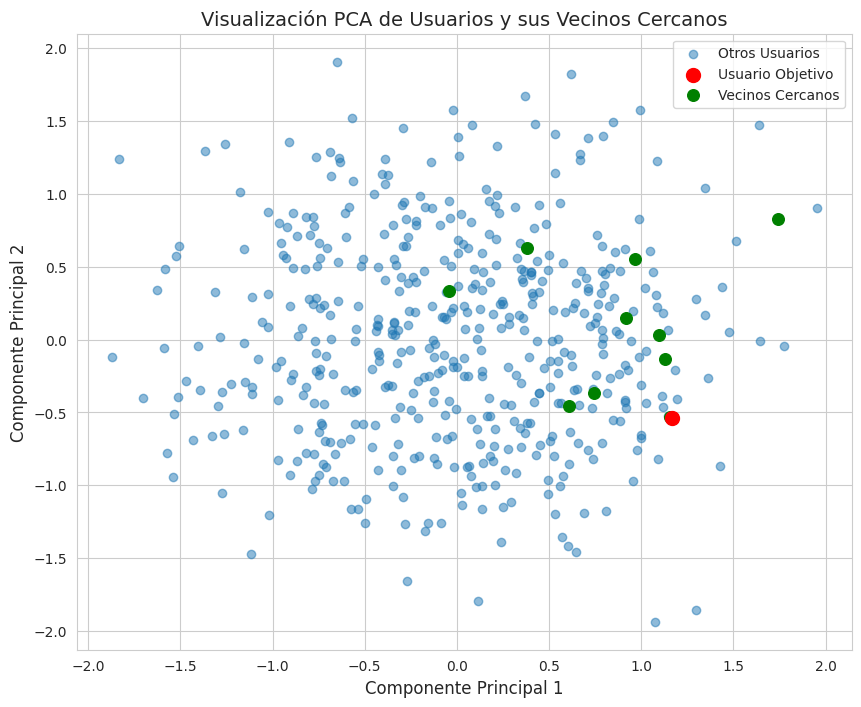

In [16]:
from sklearn.neighbors import NearestNeighbors

# Usaremos NearestNeighbors para encontrar los k vecinos más cercanos
# metric='cosine' es común para sistemas de recomendación, ya que mide la similitud de orientación
# en lugar de la magnitud, lo cual es útil para calificaciones de usuarios.
# Sin embargo, para mantener la consistencia con KNN como clasificador, usaremos 'euclidean' o 'minkowski'
# y nos enfocaremos en la distancia para encontrar los más cercanos.

# Para este ejemplo, usaremos el modelo KNeighborsClassifier para demostrar cómo se podría adaptar
# para un problema de recomendación, aunque en la práctica se usaría NearestNeighbors para encontrar
# vecinos y luego un algoritmo de recomendación para generar las sugerencias.
# Aquí simularemos la recomendación basándonos en la 'clasificación' de productos preferidos.

# Primero, necesitamos una forma de representar los productos que un usuario 'prefiere'.
# Para simplificar, consideraremos que un usuario 'prefiere' un producto si lo califica con 4 o 5.
# Crearemos una matriz binaria de preferencias.

df_preferences = (df_ratings >= 4).astype(int).fillna(0) # 1 si prefiere, 0 si no o no ha calificado

# Ahora, cada fila es un usuario y cada columna es un producto. El valor es 1 si lo prefiere, 0 si no.
# Podemos usar esto para encontrar usuarios similares y luego recomendar productos que sus vecinos prefieren.

# Para demostrar KNN, vamos a crear un 'usuario objetivo' y encontrar sus vecinos.
# Luego, recomendaremos productos que esos vecinos prefieren y que el usuario objetivo no ha 'preferido'.

# Seleccionamos un usuario aleatorio como usuario objetivo
np.random.seed(42)
usuario_objetivo_idx = np.random.randint(0, num_usuarios)
usuario_objetivo = df_preferences.iloc[usuario_objetivo_idx]

print(f"\n--- Usuario Objetivo (ID: {df_preferences.index[usuario_objetivo_idx]}) ---")
print(usuario_objetivo[usuario_objetivo == 1].index.tolist()) # Productos que prefiere

# Usaremos NearestNeighbors para encontrar los k vecinos más cercanos al usuario objetivo
k_rec = 10 # Número de vecinos para la recomendación

# Entrenamos el modelo con todos los usuarios (excluyendo el usuario objetivo si queremos recomendaciones puras)
# Para este ejemplo, incluiremos al usuario objetivo para simplificar la búsqueda de vecinos.
knn_recommender = NearestNeighbors(n_neighbors=k_rec + 1, metric='cosine') # +1 porque el usuario objetivo se encontrará a sí mismo
knn_recommender.fit(df_preferences)

# Encontrar los k vecinos más cercanos al usuario objetivo
distances, indices = knn_recommender.kneighbors(usuario_objetivo.values.reshape(1, -1))

# Los índices y distancias incluyen al propio usuario objetivo, así que los filtramos
vecinos_indices = indices.flatten()[1:]
vecinos_distancias = distances.flatten()[1:]

print(f"\n--- {k_rec} Vecinos más cercanos al Usuario Objetivo ---")
for i, (idx, dist) in enumerate(zip(vecinos_indices, vecinos_distancias)):
    print(f"Vecino {i+1}: {df_preferences.index[idx]} (Similitud Coseno: {1 - dist:.4f})")

# Generar recomendaciones
# Recopilar todos los productos preferidos por los vecinos
productos_preferidos_vecinos = df_preferences.iloc[vecinos_indices].sum(axis=0)

# Filtrar productos que el usuario objetivo ya prefiere o no ha calificado
productos_no_preferidos_por_objetivo = usuario_objetivo[usuario_objetivo == 0].index

# Productos recomendables: aquellos que los vecinos prefieren y el usuario objetivo no
recomendaciones_potenciales = productos_preferidos_vecinos[productos_preferidos_vecinos > 0].index.tolist()
recomendaciones_finales = [prod for prod in recomendaciones_potenciales if prod in productos_no_preferidos_por_objetivo]

# Ordenar recomendaciones por la cantidad de vecinos que las prefieren
recomendaciones_finales_ordenadas = sorted(recomendaciones_finales,
                                           key=lambda x: productos_preferidos_vecinos[x],
                                           reverse=True)

print(f"\n--- Productos Recomendados para el Usuario Objetivo (Top 5) ---")
if recomendaciones_finales_ordenadas:
    for i, prod in enumerate(recomendaciones_finales_ordenadas[:5]):
        print(f"{i+1}. {prod} (Preferido por {productos_preferidos_vecinos[prod]} vecinos)")
else:
    print("No hay recomendaciones únicas basadas en los vecinos cercanos.")

# Visualización de la similitud entre el usuario objetivo y sus vecinos
# Para una visualización más rica, podríamos reducir la dimensionalidad de los datos de preferencia
# y luego graficar los usuarios.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
preferences_2d = pca.fit_transform(df_preferences)

plt.figure(figsize=(10, 8))
plt.scatter(preferences_2d[:, 0], preferences_2d[:, 1], alpha=0.5, label='Otros Usuarios')
plt.scatter(preferences_2d[usuario_objetivo_idx, 0], preferences_2d[usuario_objetivo_idx, 1], color='red', s=100, label='Usuario Objetivo', zorder=5)
plt.scatter(preferences_2d[vecinos_indices, 0], preferences_2d[vecinos_indices, 1], color='green', s=70, label='Vecinos Cercanos', zorder=4)
plt.title('Visualización PCA de Usuarios y sus Vecinos Cercanos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

### 4.4 Análisis de las Recomendaciones Generadas

El análisis de las recomendaciones generadas por un sistema basado en KNN implica evaluar no solo la precisión de las sugerencias, sino también su diversidad, novedad y la satisfacción del usuario. En nuestro ejemplo, las recomendaciones se basan en la agregación de preferencias de los usuarios más similares. Esto significa que los productos recomendados son aquellos que han sido bien recibidos por personas con gustos parecidos al usuario objetivo, pero que este último aún no ha explorado.

**Métricas de Evaluación (Conceptuales para este ejemplo):**

*   **Precisión de la Recomendación:** ¿Cuántas de las recomendaciones hechas son realmente relevantes o de interés para el usuario? Esto a menudo se mide en sistemas reales a través de tasas de clics, compras o calificaciones explícitas de los usuarios sobre los ítems recomendados.
*   **Cobertura:** ¿Qué porcentaje de los ítems disponibles puede ser recomendado por el sistema? Un sistema con baja cobertura podría no ser útil para todos los ítems.
*   **Novedad:** ¿El sistema recomienda ítems que el usuario no habría descubierto por sí mismo? Recomendar ítems obvios puede ser menos valioso.
*   **Diversidad:** ¿Las recomendaciones son variadas o se centran en un tipo muy específico de ítem? Una mayor diversidad puede enriquecer la experiencia del usuario.

En el contexto de nuestro ejemplo sintético, la visualización PCA nos ayuda a entender cómo se agrupan los usuarios en función de sus preferencias, y cómo el usuario objetivo se sitúa entre sus vecinos. Los productos recomendados son aquellos que se encuentran en la intersección de las preferencias de los vecinos, pero fuera del conjunto de preferencias del usuario objetivo. Esto simula un proceso de descubrimiento basado en la sabiduría colectiva de usuarios similares.

### 4.5 Implicaciones Estratégicas y Personalización

La implementación de un sistema de recomendación basado en KNN tiene profundas implicaciones estratégicas para las empresas, permitiendo un nivel de personalización que puede impulsar el crecimiento y la lealtad del cliente:

1.  **Aumento de Ventas y Conversiones:** Al sugerir productos relevantes, las empresas pueden aumentar la probabilidad de compra y el valor promedio del pedido. Los clientes encuentran más fácilmente lo que buscan o descubren nuevos productos que les interesan, lo que se traduce en mayores ingresos.
2.  **Mejora de la Experiencia del Cliente:** La personalización hace que los clientes se sientan comprendidos y valorados. Un sistema de recomendación efectivo reduce la




## 5. Visualizaciones Avanzadas y Análisis Profundo

Las visualizaciones son herramientas poderosas para comprender el comportamiento de los datos, el funcionamiento de los algoritmos y la interpretación de los resultados del modelo. En el contexto de KNN, las visualizaciones nos ayudan a entender la noción de "vecindad", la influencia del parámetro `k`, y cómo las decisiones del modelo se traducen en implicaciones de negocio. Esta sección profundiza en visualizaciones que complementan los análisis previos y ofrecen una perspectiva más rica para la toma de decisiones.

### 5.1 Visualización de la Similitud y Vecinos Cercanos

Comprender cómo KNN identifica a los "vecinos más cercanos" es fundamental. Aunque en espacios de alta dimensionalidad es imposible visualizar directamente, podemos usar técnicas de reducción de dimensionalidad como PCA (Análisis de Componentes Principales) o t-SNE para proyectar los datos en 2 o 3 dimensiones y observar la agrupación de puntos y la identificación de vecinos.

Para el caso de uso de Predicción de Abandono (Churn Prediction), podemos visualizar cómo los clientes con y sin churn se distribuyen en un espacio reducido y cómo un nuevo cliente (hipotético) sería clasificado basándose en sus vecinos.

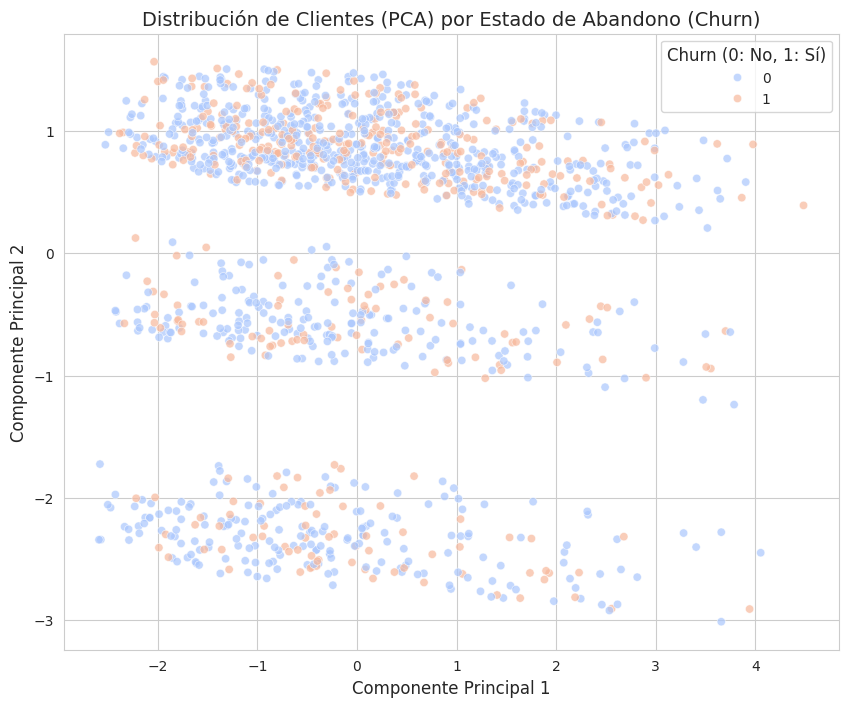

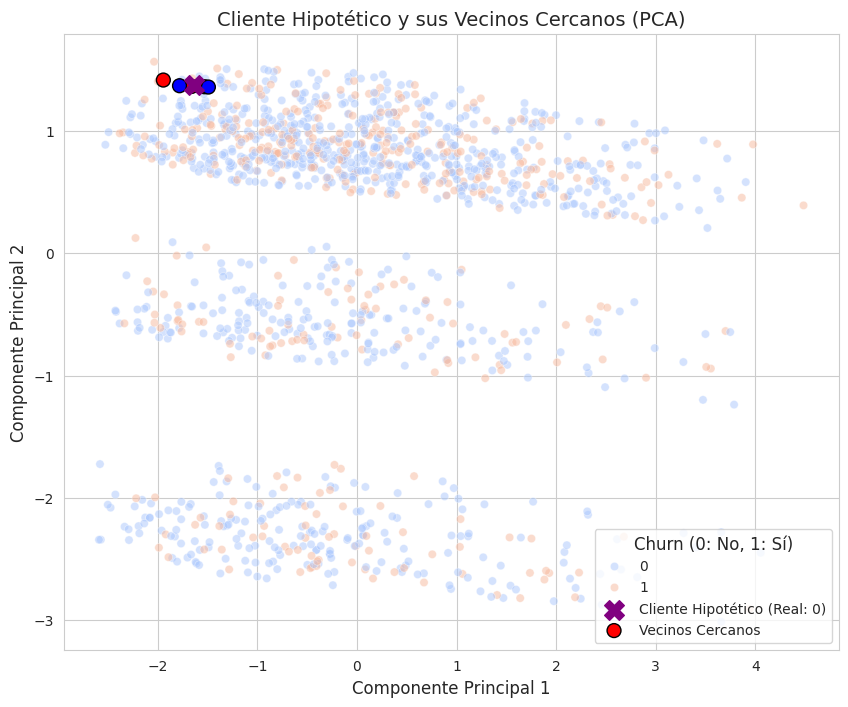

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Reducir la dimensionalidad de los datos de entrenamiento para visualización
pca_churn = PCA(n_components=2)
X_train_pca = pca_churn.fit_transform(X_train_scaled)

# Crear un DataFrame para la visualización
df_pca_churn = pd.DataFrame(data = X_train_pca, columns = ['PC1', 'PC2'])
df_pca_churn['Churn'] = y_train.values

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=df_pca_churn, palette='coolwarm', alpha=0.7)
plt.title('Distribución de Clientes (PCA) por Estado de Abandono (Churn)' )
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Churn (0: No, 1: Sí)')
plt.show()

# Visualización de un cliente hipotético y sus vecinos
# Seleccionamos un punto aleatorio del conjunto de prueba como cliente hipotético
np.random.seed(42)
random_idx = np.random.randint(0, len(X_test_scaled))
hypothetical_customer = X_test_scaled[random_idx].reshape(1, -1)
hypothetical_customer_churn = y_test.iloc[random_idx]

# Encontrar los k vecinos más cercanos a este cliente hipotético en el conjunto de entrenamiento
k_viz = 5 # Usamos k=5 para la visualización
knn_viz = KNeighborsClassifier(n_neighbors=k_viz)
knn_viz.fit(X_train_scaled, y_train)

distances_hypo, indices_hypo = knn_viz.kneighbors(hypothetical_customer)

# Proyectar el cliente hipotético y sus vecinos en el espacio PCA
hypothetical_customer_pca = pca_churn.transform(hypothetical_customer)
neighbors_pca = pca_churn.transform(X_train_scaled[indices_hypo[0]])
neighbors_churn = y_train.iloc[indices_hypo[0]]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=df_pca_churn, palette='coolwarm', alpha=0.5) # Removed label='Otros Clientes'
plt.scatter(hypothetical_customer_pca[0, 0], hypothetical_customer_pca[0, 1], color='purple', marker='X', s=200, label=f'Cliente Hipotético (Real: {hypothetical_customer_churn})', zorder=5)
plt.scatter(neighbors_pca[:, 0], neighbors_pca[:, 1], c=neighbors_churn.map({0: 'blue', 1: 'red'}), marker='o', s=100, edgecolor='black', linewidth=1, label='Vecinos Cercanos', zorder=4)

plt.title('Cliente Hipotético y sus Vecinos Cercanos (PCA)' )
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Churn (0: No, 1: Sí)')
plt.show()

Esta visualización nos permite observar cómo el cliente hipotético se posiciona en relación con los clientes que abandonaron y los que no, y cómo sus vecinos más cercanos influyen en su clasificación. Si la mayoría de los vecinos cercanos del cliente hipotético son clientes que abandonaron, el modelo predecirá que este cliente también abandonará.

### 5.2 Análisis de Sensibilidad del Parámetro 'k'

La elección del valor de `k` es un hiperparámetro crítico en KNN. Un `k` pequeño puede hacer que el modelo sea muy sensible al ruido y a los valores atípicos, lo que resulta en un modelo de alta varianza y bajo sesgo (overfitting). Por otro lado, un `k` grande puede suavizar demasiado las fronteras de decisión, lo que lleva a un modelo de bajo varianza y alto sesgo (underfitting), perdiendo la capacidad de capturar patrones locales. La curva de precisión vs. `k` que generamos en la sección 3.4 es una forma de analizar esta sensibilidad. Aquí, podemos expandir esa idea con más métricas y un análisis más profundo.

In [ ]:
# Análisis de sensibilidad de k con Accuracy, Precision y Recall para la clase Churn
k_values = range(1, 31) # Probar k desde 1 hasta 30
accuracies = []
precision_churn = []
recall_churn = []
f1_churn = []

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)

    accuracies.append(accuracy_score(y_test, y_pred_k))
    report = classification_report(y_test, y_pred_k, output_dict=True)
    precision_churn.append(report[\'1\'][\'precision\'])
    recall_churn.append(report[\'1\'][\'recall\'])
    f1_churn.append(report[\'1\'][\'f1-score\'])

plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracies, marker=\'o\', linestyle=\'-\' , label=\'Accuracy\')
plt.plot(k_values, precision_churn, marker=\'x\', linestyle=\'--\', label=\'Precision (Churn)\' )
plt.plot(k_values, recall_churn, marker=\'s\', linestyle=\'--\', label=\'Recall (Churn)\' )
plt.plot(k_values, f1_churn, marker=\'d\', linestyle=\'--\', label=\'F1-Score (Churn)\' )

plt.title(\'Rendimiento del Modelo KNN vs. Valor de k (Churn Prediction)\' )
plt.xlabel(\'Número de Vecinos (k)\' )
plt.ylabel(\'Métrica de Rendimiento\')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

optimal_k_accuracy = k_values[np.argmax(accuracies)]
optimal_k_f1 = k_values[np.argmax(f1_churn)]

print(f"\nValor de k óptimo basado en Accuracy: {optimal_k_accuracy}")
print(f"Valor de k óptimo basado en F1-Score (clase Churn): {optimal_k_f1}")

Este gráfico multiparamétrico es crucial para la toma de decisiones. Dependiendo de la estrategia de negocio, la empresa podría priorizar una métrica sobre otra. Por ejemplo, si el costo de perder un cliente es muy alto, se podría buscar un `k` que maximice el *Recall* para la clase Churn, incluso si esto implica una ligera disminución en la precisión general o un aumento en los falsos positivos. Si el presupuesto para campañas de retención es limitado, se podría priorizar la *Precision* para la clase Churn para asegurar que las intervenciones se dirijan a clientes con alta probabilidad real de abandono.

### 5.3 Interpretación de Modelos y Feature Importance (Proxy)

Una limitación común de KNN es que no proporciona una "importancia de características" directa como otros modelos (ej. árboles de decisión, modelos lineales). Sin embargo, podemos inferir la importancia relativa de las características a través de métodos indirectos o análisis de sensibilidad. Una forma es observar cómo la eliminación o perturbación de una característica afecta el rendimiento del modelo, o cómo las características de los vecinos más cercanos se alinean con las del punto de interés.

Otro enfoque, más interpretable para negocios, es analizar las características de los vecinos cercanos de un cliente específico. Si un cliente está en riesgo de abandono, examinar las características de sus vecinos que también abandonaron puede revelar patrones clave.


--- Análisis de Vecinos para el Cliente de Muestra (ID: 1) ---
Características del Cliente de Muestra (No Escaladas):
Antiguedad_Meses                        1.0
Factura_Mensual                   76.892141
Total_Gastado                     77.044723
Servicio_Internet_Fibra Optica         True
Servicio_Internet_No                  False
Tipo_Contrato_Dos Anos                False
Tipo_Contrato_Mensual                 False
Soporte_Tecnico_Si                    False
Multiples_Lineas_Si                    True
Name: 801, dtype: object
Predicción del modelo para este cliente: 1 (Real: 0)

Características de sus Vecinos Cercanos (No Escaladas) y su estado de Churn:
      Antiguedad_Meses  Factura_Mensual  Total_Gastado  \
354                1.0        73.966179      86.024906   
583                1.0        66.572558      60.194576   
1777               7.0        64.959891     409.552774   
1308              12.0        85.399422    1145.489586   
1036              14.0        67.714638

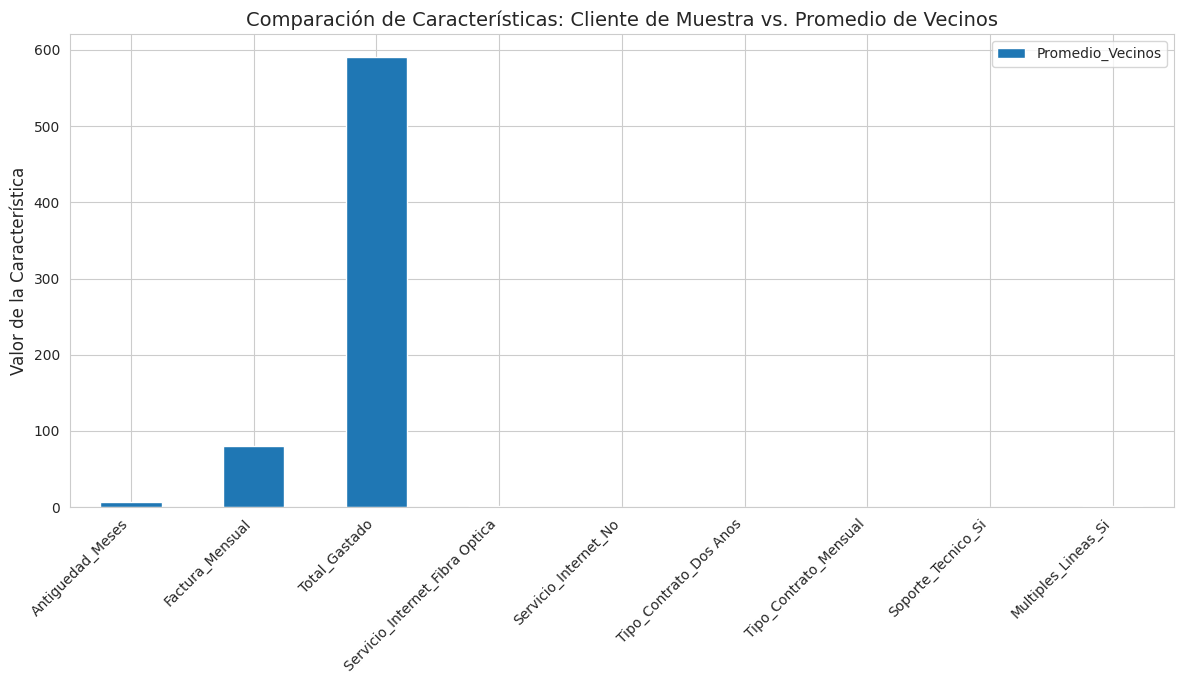

In [22]:
# Análisis de características de los vecinos para un cliente en riesgo
# Seleccionamos un cliente del conjunto de prueba que el modelo predijo como Churn (FP o TP)
churn_risk_customers_indices = X_test_scaled_df[y_pred == 1].index

if not churn_risk_customers_indices.empty:
    # Get the positional index of the first customer predicted as churn
    sample_customer_pos = X_test_scaled_df.index.get_loc(churn_risk_customers_indices[0])
    sample_customer_idx = churn_risk_customers_indices[0] # Keep original index for printing

    sample_customer_data = X_test_scaled_df.iloc[sample_customer_pos].values.reshape(1, -1)

    # Encontrar los k vecinos más cercanos en el conjunto de entrenamiento
    k_analysis = 5
    distances_analysis, indices_analysis = knn_classifier.kneighbors(sample_customer_data)

    # Obtener los datos originales (no escalados) de los vecinos y del cliente de muestra
    original_sample_customer_data = X_test.iloc[sample_customer_pos]
    original_neighbors_data = X_train.iloc[indices_analysis[0]]
    original_neighbors_churn = y_train.iloc[indices_analysis[0]]


    print(f"\n--- Análisis de Vecinos para el Cliente de Muestra (ID: {sample_customer_idx}) ---")
    print("Características del Cliente de Muestra (No Escaladas):")
    print(original_sample_customer_data)
    print(f"Predicción del modelo para este cliente: {y_pred[sample_customer_pos]} (Real: {y_test.iloc[sample_customer_pos]})\n")


    print("Características de sus Vecinos Cercanos (No Escaladas) y su estado de Churn:")
    df_neighbors_analysis = original_neighbors_data.copy()
    df_neighbors_analysis["Churn_Real_Vecino"] = original_neighbors_churn.values
    print(df_neighbors_analysis)

    # Comparación de características promedio entre el cliente y sus vecinos
    print("\n--- Comparación de Características Promedio (Cliente vs. Vecinos) ---")
    comparison_df = pd.DataFrame({
        'Cliente_Muestra': original_sample_customer_data,
        'Promedio_Vecinos': original_neighbors_data.mean()
    })
    print(comparison_df)

    # Visualización de la comparación de características
    comparison_df.plot(kind='bar', figsize=(12, 7))
    plt.title('Comparación de Características: Cliente de Muestra vs. Promedio de Vecinos')
    plt.ylabel('Valor de la Característica')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("No se encontraron clientes predichos como Churn en el conjunto de prueba para este análisis.")

Este análisis de los vecinos cercanos es particularmente valioso para los gerentes de producto y marketing. Si un cliente está en riesgo de abandono, y sus vecinos más cercanos que también abandonaron tienen en común, por ejemplo, un tipo de contrato específico o la ausencia de soporte técnico, esto puede indicar áreas de mejora en el servicio o la necesidad de ofertas de retención dirigidas a esas características. Esta es una forma práctica de extraer "insights" de un modelo como KNN, que de otra manera podría parecer una "caja negra".




## 6. Conclusiones, Limitaciones y Futuras Direcciones

### 6.1 Resumen de Aprendizajes Clave

Este notebook ha explorado en profundidad el algoritmo K-Nearest Neighbors (KNN) y su aplicación práctica en dos casos de uso empresariales críticos: la predicción de abandono de clientes (Churn Prediction) y la construcción de un sistema de recomendación basado en la similitud de usuarios. Hemos demostrado cómo KNN, a pesar de su simplicidad conceptual, puede ser una herramienta poderosa y versátil para la toma de decisiones estratégicas en el ámbito de los negocios.

Los aprendizajes clave incluyen:

*   **Fundamentos de KNN:** Comprendimos los principios básicos de KNN, su naturaleza no paramétrica y su dependencia de la métrica de distancia y el parámetro `k`.
*   **Preprocesamiento Crucial:** La importancia del escalado de características y el manejo de valores nulos fue enfatizada, destacando cómo estos pasos son vitales para el rendimiento óptimo de KNN.
*   **Predicción de Churn:** Aplicamos KNN para clasificar clientes en riesgo de abandono, interpretando métricas como la precisión, el recall, el F1-score y la curva ROC. Se discutió cómo estas métricas informan las estrategias de retención, permitiendo a las empresas priorizar intervenciones y optimizar recursos.
*   **Sistemas de Recomendación:** Desarrollamos un enfoque basado en KNN para recomendar productos a usuarios, identificando vecinos con gustos similares. Este caso de uso ilustró cómo la personalización puede mejorar la experiencia del cliente y las ventas.
*   **Visualizaciones para la Interpretación:** Se utilizaron visualizaciones avanzadas, incluyendo la reducción de dimensionalidad con PCA y gráficos de sensibilidad de `k`, para obtener una comprensión más profunda del modelo y sus decisiones, facilitando la comunicación de insights a stakeholders no técnicos.
*   **Análisis de Vecinos:** Se demostró cómo el análisis de las características de los vecinos cercanos puede servir como un proxy para la importancia de las características, ofreciendo insights accionables para la mejora de productos o servicios.

En conjunto, este trabajo subraya que KNN no es solo un algoritmo académico, sino una solución práctica y efectiva para problemas de negocio complejos, capaz de generar valor tangible a través de decisiones basadas en datos.

### 6.2 Limitaciones de KNN y Consideraciones Éticas

Aunque KNN es un algoritmo robusto, es importante reconocer sus limitaciones y las consideraciones éticas asociadas a su implementación en un contexto empresarial:

**Limitaciones:**

*   **Costo Computacional y Escalabilidad:** Para datasets muy grandes, el cálculo de distancias a todos los puntos de entrenamiento en cada predicción puede ser prohibitivamente lento. Esto lo hace menos adecuado para escenarios de inferencia en tiempo real con volúmenes masivos de datos. Técnicas como la búsqueda de vecinos aproximados (Approximate Nearest Neighbors - ANN) pueden mitigar esto, pero añaden complejidad.
*   **Maldición de la Dimensionalidad:** En espacios de alta dimensionalidad (muchas características), la distancia entre puntos se vuelve menos significativa, y el rendimiento de KNN se degrada. Esto requiere una cuidadosa selección de características o el uso de técnicas de reducción de dimensionalidad.
*   **Sensibilidad al Ruido y Outliers:** Un valor pequeño de `k` hace que el modelo sea muy susceptible a puntos de datos ruidosos o atípicos, que pueden distorsionar la clasificación o recomendación. El preprocesamiento robusto es esencial.
*   **Balance de Clases:** En problemas de clasificación con clases desbalanceadas, la clase mayoritaria puede dominar la votación de los vecinos, llevando a un bajo rendimiento en la clase minoritaria. Estrategias como el sobremuestreo (oversampling) o submuestreo (undersampling) son necesarias.
*   **Falta de Modelo Explícito:** Al ser un algoritmo de "aprendizaje perezoso", KNN no genera un modelo explícito o un conjunto de reglas. Esto puede dificultar la interpretación directa de "por qué" se hizo una predicción específica, aunque el análisis de vecinos cercanos ayuda a mitigar esto.

**Consideraciones Éticas:**

*   **Sesgos en los Datos:** Si los datos de entrenamiento contienen sesgos históricos (por ejemplo, en la asignación de segmentos o en las decisiones de churn), KNN los replicará y perpetuará. Es crucial auditar los datos y el rendimiento del modelo en diferentes subgrupos para asegurar la equidad.
*   **Privacidad:** Los sistemas de recomendación basados en la similitud de usuarios pueden plantear preocupaciones sobre la privacidad, ya que el comportamiento de un usuario se utiliza para influir en las recomendaciones de otros. La anonimización y la agregación de datos son prácticas importantes.
*   **Transparencia y Explicabilidad:** Aunque el análisis de vecinos ayuda, la falta de un modelo explícito puede dificultar la explicación de las decisiones a los usuarios o reguladores, lo que es cada vez más importante en el contexto de la IA responsable.

### 6.3 Extensiones y Aplicaciones Avanzadas de KNN

El algoritmo KNN, en su forma básica, es un punto de partida. Existen varias extensiones y aplicaciones avanzadas que pueden mejorar su rendimiento y aplicabilidad en escenarios de negocio más complejos:

*   **KNN Ponderado:** Asignar pesos a los vecinos en función de su distancia, dando más influencia a los vecinos más cercanos. Esto puede mejorar la precisión y reducir la sensibilidad al ruido.
*   **Búsqueda de Vecinos Aproximados (ANN):** Para grandes datasets, los algoritmos ANN (como KD-Trees, Ball Trees o LSH) pueden acelerar significativamente la búsqueda de vecinos, sacrificando una pequeña cantidad de precisión por una mejora sustancial en la velocidad.
*   **KNN para Datos Temporales/Secuenciales:** Adaptaciones de KNN pueden ser utilizadas para series temporales, donde la similitud se mide entre secuencias de eventos o comportamientos a lo largo del tiempo. Esto es relevante para predecir patrones de compra o uso de servicios.
*   **KNN en Procesamiento de Lenguaje Natural (NLP):** KNN puede ser utilizado para tareas como la clasificación de texto, la detección de spam o la recomendación de documentos, donde la similitud se calcula entre representaciones vectoriales de texto (embeddings).
*   **KNN Híbrido en Sistemas de Recomendación:** Combinar KNN con otros enfoques (por ejemplo, filtrado basado en contenido o modelos factoriales) puede superar las limitaciones de un solo método, ofreciendo recomendaciones más robustas y diversas.
*   **Detección de Anomalías:** KNN puede ser utilizado para identificar puntos de datos que están lejos de sus vecinos, lo que puede indicar anomalías o fraudes. Esto es útil en la detección de transacciones sospechosas o comportamientos inusuales de clientes.

La continua evolución de las técnicas de preprocesamiento, la disponibilidad de hardware más potente y el desarrollo de algoritmos de búsqueda de vecinos más eficientes aseguran que KNN seguirá siendo una herramienta relevante y valiosa en el arsenal de cualquier científico de datos o analista de negocios.

## 7. Referencias y Recursos Adicionales

*   **Scikit-learn Documentation:** [https://scikit-learn.org/stable/modules/neighbors.html](https://scikit-learn.org/stable/modules/neighbors.html)
*   **Géron, Aurélien. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. O'Reilly Media.**
*   **James, Gareth, et al. (2013). *An Introduction to Statistical Learning: with Applications in R*. Springer.** (Capítulo 2: Statistical Learning, Capítulo 4: Classification)
*   **Wikipedia - K-Nearest Neighbors Algorithm:** [https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
*   **Towards Data Science - Understanding K-Nearest Neighbors:** [https://towardsdatascience.com/understanding-k-nearest-neighbors-knn-algorithm-in-python-with-example-a3209017254c](https://towardsdatascience.com/understanding-k-nearest-neighbors-knn-algorithm-in-python-with-example-a3209017254c)